***BlueSky Airlines Case: Solution***

Python packages for simulation:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

**Question 1**

This question asks for a deterministic function, so we can simply describe it in a markdown cell. Given the demand for FF, $D_{F}$, and the demand for SS, $D_S$, the revenue with a SS booking limit equal to 120 is
$$
R 
=
350 \times \min\{D_S, 120\} + 850 \times \min\{D_F, 200 - \min\{D_S, 120\}\}
.
$$
The idea here is that the SS tickets are sold first, and these have a price of 350. According to the booking limit, we sell at most 120 seats at this fare level. Then, the remaining seats are sold at the FF price of 850. The number of remaining seats is $200 - \min\{D_S, 120\}$, which is the number of seats available after the SS demand is satisfied. The demand for FF is then capped at this number, since we cannot sell more FF tickets than there are seats available.

In [10]:
# print the revenue for BlueSky given that D_S = 130 and D_F = 55, which is R = 350 * min(130, 120) + 850 * min(55, 200 - min(130, 120)), and format in USD
print("The revenue for BlueSky given that SS demand is 130 and FS demand is 55 is: ${:,.2f}".format(350 * min(130, 120) + 850 * min(55, 200 - min(130, 120))))

The revenue for BlueSky given that SS demand is 130 and FS demand is 55 is: $88,750.00


**Question 2**

This question now introduces randomness, which brings us to simulation. We are told from the prompt that the demand for SS is Normal with mean 130 and standard deviation 45, and the demand for FF is Normal(55, 20). We want to now calculate expected revenue under this demand uncertainty and an SS booking limit of 120. Hence, we will conduct a simulation.

We begin by defining the model parameters.

In [11]:
# set the number of simulations, numSim
numSim = 10000

# define two fare types, SS and FF
fareType = ['SS', 'FF']

# define mean and standard deviations dictionaries for the two fare types: 130 and 45 for SS, 55 and 20 for FF
mean = {'SS': 130, 'FF': 55}
stdev = {'SS': 45, 'FF': 20}

# define prices for the two fare types: 350 for SS, 850 for FF
price = {'SS': 350, 'FF': 850}

# define the booking limit for SS, 120
bookLimitSS = 120

# define the plane capacity, 200
planeCapacity = 200

In [12]:
# define a list to store the revenue for each replication in the numSim simulations, and initialize it as a list of zeros
revenue = [0] * numSim

for n in range(numSim):

    # generate a normal random variable for the SS demand using the mean and standard deviation defined above
    demandSS = np.random.normal(mean['SS'], stdev['SS'])

    # generate a normal random variable for the FF demand using the mean and standard deviation defined above
    demandFF = np.random.normal(mean['FF'], stdev['FF'])

    # calculate the revenue for BlueSky given the demand for SS and FF, and store it in the revenue list
    revenue[n] = price['SS'] * min(demandSS, bookLimitSS) + price['FF'] * min(demandFF, planeCapacity - min(demandSS, bookLimitSS))
    


The mean revenue is: $83,561.70
The 95% confidence interval for the revenue is: ($83,214.69, $83,908.70)
The probability that the SS demand is greater than 120 times the probability that the FF demand is greater than 80 is: 6.2%


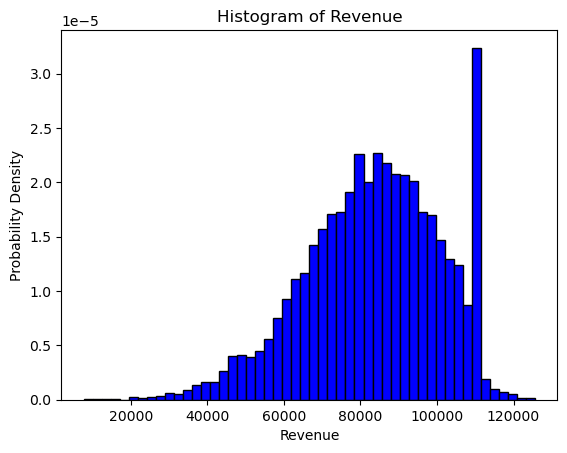

In [13]:
# plot the histogram of the revenue list, and format the plot to show the title, x-axis label, and y-axis label
plt.hist(revenue, bins=50, density=True, color='blue', edgecolor='black')
plt.title('Histogram of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Probability Density')

# calculate the mean and standard deviation of the revenue list
meanRevenue = np.mean(revenue)
stdRevenue = np.std(revenue)

# print the mean revenue and 95% confidence interval for the revenue, and format in USD
print("The mean revenue is: ${:,.2f}".format(meanRevenue))
print("The 95% confidence interval for the revenue is: (${0:,.2f}, ${1:,.2f})".format(meanRevenue - 1.96 * stdRevenue / np.sqrt(numSim), meanRevenue + 1.96 * stdRevenue / np.sqrt(numSim)))


# print the probability that the SS demand is greater than 120 times the probability that the FF demand is greater than 200 - 120 = 80, which can be calculated directly from the normal distributions
print("The probability that the SS demand is greater than 120 times the probability that the FF demand is greater than 80 is: {:,.1f}%".format((1 - stats.norm(mean['SS'], stdev['SS']).cdf(bookLimitSS)) * (1 - stats.norm(mean['FF'], stdev['FF']).cdf(planeCapacity - bookLimitSS)) * 100))

**Question 3**

To find the optimal booking limit, we will use a "brute force" approach, meaning that we will try many options and pick the best one. In this case, we will try all booking limits between 0 and 200, and we will pick the one that maximizes expected revenue. We will use the same demand distributions as in Question 2. We first search in multiples of 10. Then, we will search in multiples of 1 around the best booking limit from the first search.

In [14]:
# for a booking limit of 10 to 200 in increments of 10, calculate the mean revenue and 95% confidence interval for the revenue using the same simulation procedure as above, and store them in lists
bookLimit = range(10, 210, 10)
meanRevenue = [0] * len(bookLimit)
stdRevenue = [0] * len(bookLimit)
for i in range(len(bookLimit)):
    revenue = [0] * numSim
    for n in range(numSim):
        demandSS = np.random.normal(mean['SS'], stdev['SS'])
        demandFF = np.random.normal(mean['FF'], stdev['FF'])
        revenue[n] = price['SS'] * min(demandSS, bookLimit[i]) + price['FF'] * min(demandFF, planeCapacity - min(demandSS, bookLimit[i]))
    meanRevenue[i] = np.mean(revenue)
    stdRevenue[i] = np.std(revenue)

Booking Limit	Mean Revenue	95% Confidence Interval
10		$50,362.75		($50,026.62, $50,698.88)
20		$53,491.01		($53,155.79, $53,826.23)
30		$57,136.52		($56,805.41, $57,467.64)
40		$60,712.81		($60,379.21, $61,046.41)
50		$64,120.89		($63,782.62, $64,459.17)
60		$67,338.48		($67,003.44, $67,673.51)
70		$70,674.76		($70,335.30, $71,014.22)
80		$73,618.34		($73,276.42, $73,960.26)
90		$76,612.39		($76,265.42, $76,959.37)
100		$79,257.03		($78,907.88, $79,606.19)
110		$81,591.02		($81,241.22, $81,940.81)
120		$83,523.36		($83,178.04, $83,868.68)
130		$84,996.97		($84,662.01, $85,331.92)
140		$84,877.39		($84,550.42, $85,204.37)
150		$84,589.79		($84,273.44, $84,906.13)
160		$84,106.58		($83,805.51, $84,407.64)
170		$83,384.28		($83,090.73, $83,677.83)
180		$82,673.97		($82,382.12, $82,965.82)
190		$82,154.21		($81,854.99, $82,453.43)
200		$81,698.42		($81,394.27, $82,002.56)


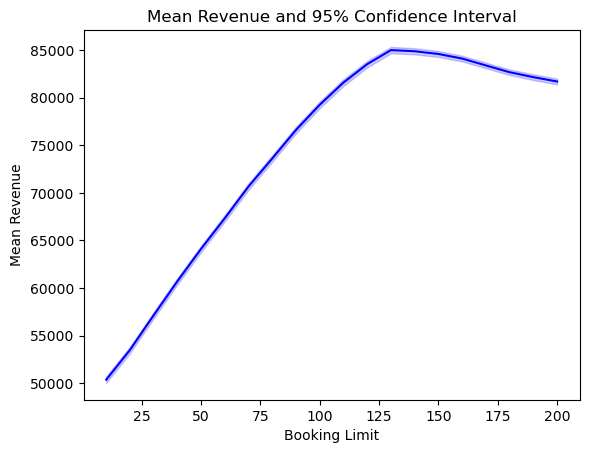

In [15]:
# print a table of mean revenue and 95% confidence interval for the revenue for each booking limit, with the booking limit in the first column, mean revenue in the second column, and 95% confidence interval in the third column, and format in USD
print("Booking Limit\tMean Revenue\t95% Confidence Interval")
for i in range(len(bookLimit)):
    print("{0}\t\t${1:,.2f}\t\t(${2:,.2f}, ${3:,.2f})".format(bookLimit[i], meanRevenue[i], meanRevenue[i] - 1.96 * stdRevenue[i] / np.sqrt(numSim), meanRevenue[i] + 1.96 * stdRevenue[i] / np.sqrt(numSim)))

# plot the mean revenue and 95% confidence interval for the revenue for each booking limit, and format the plot to show the title, x-axis label, and y-axis label. format the confidence interval as a shaded region
plt.plot(bookLimit, meanRevenue, color='blue')
plt.fill_between(bookLimit, np.array(meanRevenue) - 1.96 * np.array(stdRevenue) / np.sqrt(numSim), np.array(meanRevenue) + 1.96 * np.array(stdRevenue) / np.sqrt(numSim), color='blue', alpha=0.2)
plt.title('Mean Revenue and 95% Confidence Interval')
plt.xlabel('Booking Limit')
plt.ylabel('Mean Revenue')

# show the plot
plt.show()

In [16]:
# for a booking limit of 131 to 149 in increments of 1, calculate the mean revenue and 95% confidence interval for the revenue using the same simulation procedure as above, and store them in lists
bookLimit = range(131, 150, 1)
meanRevenue = [0] * len(bookLimit)
stdRevenue = [0] * len(bookLimit)
for i in range(len(bookLimit)):
    revenue = [0] * numSim
    for n in range(numSim):
        demandSS = np.random.normal(mean['SS'], stdev['SS'])
        demandFF = np.random.normal(mean['FF'], stdev['FF'])
        revenue[n] = price['SS'] * min(demandSS, bookLimit[i]) + price['FF'] * min(demandFF, planeCapacity - min(demandSS, bookLimit[i]))
    meanRevenue[i] = np.mean(revenue)
    stdRevenue[i] = np.std(revenue)

Booking Limit	Mean Revenue	95% Confidence Interval
131		$84,850.85		($84,516.41, $85,185.28)
132		$84,862.98		($84,527.66, $85,198.30)
133		$84,785.74		($84,453.96, $85,117.52)
134		$84,546.31		($84,209.51, $84,883.10)
135		$84,749.72		($84,416.21, $85,083.22)
136		$85,244.10		($84,915.05, $85,573.15)
137		$84,718.82		($84,386.80, $85,050.83)
138		$84,968.18		($84,637.23, $85,299.13)
139		$85,234.46		($84,912.23, $85,556.69)
140		$84,935.36		($84,602.39, $85,268.33)
141		$84,848.73		($84,521.84, $85,175.63)
142		$85,053.50		($84,731.26, $85,375.75)
143		$85,033.82		($84,712.28, $85,355.37)
144		$84,924.10		($84,604.08, $85,244.12)
145		$85,109.30		($84,792.97, $85,425.64)
146		$84,792.59		($84,471.90, $85,113.28)
147		$85,028.34		($84,715.39, $85,341.29)
148		$85,124.71		($84,813.71, $85,435.71)
149		$84,748.18		($84,435.36, $85,060.99)


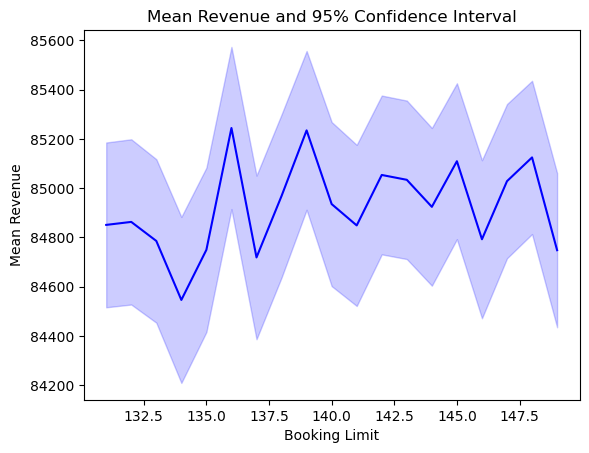

In [17]:
# print a table of mean revenue and 95% confidence interval for the revenue for each booking limit, with the booking limit in the first column, mean revenue in the second column, and 95% confidence interval in the third column, and format in USD
print("Booking Limit\tMean Revenue\t95% Confidence Interval")
for i in range(len(bookLimit)):
    print("{0}\t\t${1:,.2f}\t\t(${2:,.2f}, ${3:,.2f})".format(bookLimit[i], meanRevenue[i], meanRevenue[i] - 1.96 * stdRevenue[i] / np.sqrt(numSim), meanRevenue[i] + 1.96 * stdRevenue[i] / np.sqrt(numSim)))

# plot the mean revenue and 95% confidence interval for the revenue for each booking limit, and format the plot to show the title, x-axis label, and y-axis label. format the confidence interval as a shaded region
plt.plot(bookLimit, meanRevenue, color='blue')
plt.fill_between(bookLimit, np.array(meanRevenue) - 1.96 * np.array(stdRevenue) / np.sqrt(numSim), np.array(meanRevenue) + 1.96 * np.array(stdRevenue) / np.sqrt(numSim), color='blue', alpha=0.2)
plt.title('Mean Revenue and 95% Confidence Interval')
plt.xlabel('Booking Limit')
plt.ylabel('Mean Revenue')

# show the plot
plt.show()

In [18]:
# rerun the simulation for a booking limit of 131 to 149 in increments of 1, but this time, do so with a number of replications (named numSim2) that is 1000 times larger than the number of simulations, and store the mean revenue and 95% confidence interval for the revenue in the same lists as before. additionally, for the sake of speed, generate the random variables for the SS and FF demands in advance within each booking limit setting
bookLimit = range(131, 150, 1)
meanRevenue = [0] * len(bookLimit)
stdRevenue = [0] * len(bookLimit)
numSim2 = 1000 * numSim
demandSS = np.random.normal(mean['SS'], stdev['SS'], (len(bookLimit), numSim2))
demandFF = np.random.normal(mean['FF'], stdev['FF'], (len(bookLimit), numSim2))
for i in range(len(bookLimit)):
    revenue = price['SS'] * np.minimum(demandSS[i], bookLimit[i]) + price['FF'] * np.minimum(demandFF[i], planeCapacity - np.minimum(demandSS[i], bookLimit[i]))
    meanRevenue[i] = np.mean(revenue)
    stdRevenue[i] = np.std(revenue)

Booking Limit	Mean Revenue	95% Confidence Interval
131		$84,738.97		($84,728.28, $84,749.66)
132		$84,806.56		($84,795.91, $84,817.21)
133		$84,867.29		($84,856.68, $84,877.89)
134		$84,926.20		($84,915.63, $84,936.76)
135		$84,955.31		($84,944.78, $84,965.83)
136		$85,001.39		($84,990.91, $85,011.87)
137		$85,030.19		($85,019.75, $85,040.62)
138		$85,049.12		($85,038.73, $85,059.51)
139		$85,059.22		($85,048.87, $85,069.56)
140		$85,068.66		($85,058.37, $85,078.96)
141		$85,072.75		($85,062.50, $85,083.00)
142		$85,059.45		($85,049.24, $85,069.65)
143		$85,042.21		($85,032.06, $85,052.37)
144		$85,025.38		($85,015.27, $85,035.49)
145		$85,001.86		($84,991.80, $85,011.92)
146		$84,960.89		($84,950.87, $84,970.92)
147		$84,945.40		($84,935.43, $84,955.36)
148		$84,906.32		($84,896.40, $84,916.24)
149		$84,855.95		($84,846.08, $84,865.83)


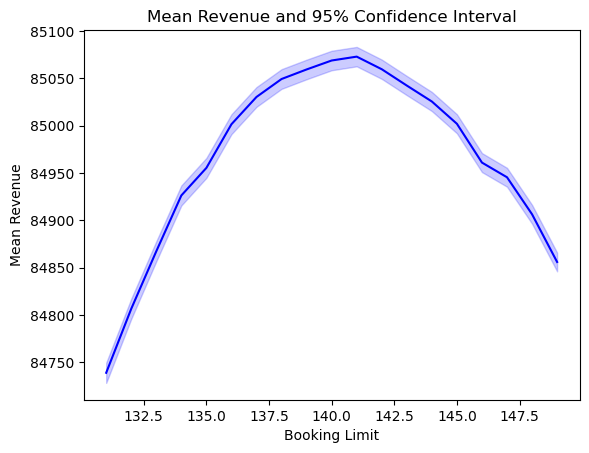

The booking limit that maximizes the mean revenue is: 141
The expected revenue is: $85,072.75


In [19]:
# print a table of mean revenue and 95% confidence interval for the revenue for each booking limit, with the booking limit in the first column, mean revenue in the second column, and 95% confidence interval in the third column, and format in USD
print("Booking Limit\tMean Revenue\t95% Confidence Interval")
for i in range(len(bookLimit)):
    print("{0}\t\t${1:,.2f}\t\t(${2:,.2f}, ${3:,.2f})".format(bookLimit[i], meanRevenue[i], meanRevenue[i] - 1.96 * stdRevenue[i] / np.sqrt(numSim2), meanRevenue[i] + 1.96 * stdRevenue[i] / np.sqrt(numSim2)))

# plot the mean revenue and 95% confidence interval for the revenue for each booking limit, and format the plot to show the title, x-axis label, and y-axis label. format the confidence interval as a shaded region
plt.plot(bookLimit, meanRevenue, color='blue')
plt.fill_between(bookLimit, np.array(meanRevenue) - 1.96 * np.array(stdRevenue) / np.sqrt(numSim2), np.array(meanRevenue) + 1.96 * np.array(stdRevenue) / np.sqrt(numSim2), color='blue', alpha=0.2)
plt.title('Mean Revenue and 95% Confidence Interval')
plt.xlabel('Booking Limit')
plt.ylabel('Mean Revenue')

# show the plot
plt.show()

# print the booking limit that maximizes the mean revenue, and format as a whole number
print("The booking limit that maximizes the mean revenue is: {:,.0f}".format(bookLimit[np.argmax(meanRevenue)]))
# print its expected revenue, and format in USD
print("The expected revenue is: ${:,.2f}".format(meanRevenue[np.argmax(meanRevenue)]))

**Question 4**

To model the overbooking problem, let us define a new revenue equation. For a uniform random variable $U$ on $[0.85, 1]$ and a triangular(0.9,0.95,1) distributed random variable $T$, we have that the fraction of SS and FF demand that actually arrives is $U * D_S$ and $T * D_F$, respectively. The revenue from selling tickets remains the same, but now we must also subtract a cost for those who are bumped. Like before, the number of tickets sold to SS and FF passengers is calculated $X_S = \min\{D_S, 160\}$ and $X_F = \min\{D_F, 220 - X_S\}$, respectively. The fraction of these passengers that arrive are $A_S = U * X_S$ and $A_F = T * X_F$. 

The number of excess passengers can then be calculated as
$$
O
=
\max\{0, A_S + A_F - 200\}
.
$$
If possible, the airline will only bump SS passengers. Let $B_S = \min\{O, A_S\}$ be the number of SS passengers bumped. Only if necessary will FF passengers be bumped. Let $B_F = O - B_S$ be the number of FF passengers bumped. 

Together, the revenue from selling tickets with overbooking is then
$$
R
=
350 \times X_S + 850 \times X_F - 450 \times B_S - 1000 \times B_F
.
$$

In [20]:
# define virtual capacity as 220
virtualCapacity = 220

# set the booking limit to 160
bookLimit = 160

# define a dictionary for the overbook cost for SS and FF to 450 and 1000, respectively
overbookCost = {'SS': 450, 'FF': 1000}

# define a list of revenues for each replication in the numSim simulations, and initialize it as a list of zeros
revenue = [0] * numSim

# define a list of bumped passengers for each replication in the numSim simulations for each fare type, and initialize them as lists of zeros
bumped = {'SS': [0] * numSim, 'FF': [0] * numSim}

for n in range(numSim):

    # generate a normal random variable for the SS demand using the mean and standard deviation defined above
    demandSS = np.random.normal(mean['SS'], stdev['SS'])
    # generate a normal random variable for the FF demand using the mean and standard deviation defined above
    demandFF = np.random.normal(mean['FF'], stdev['FF'])
    # generate U as a uniform random variable between 0.85 and 1
    U = np.random.uniform(0.85, 1)
    # generate T as a triangular random variable with a min of 0.9, a mode of 0.95, and a max of 1
    T = np.random.triangular(0.9, 0.95, 1)

    # calculate X_S, X_F, A_S, and A_F as defined in the problem statement
    X_S = min(demandSS, bookLimit)
    X_F = min(demandFF, virtualCapacity - X_S)
    A_S = U * X_S
    A_F = T * X_F

    # calculate the number of exceess passengers as defined in the problem statement
    O = max(0, A_S + A_F - planeCapacity)

    # calculate the number of passengers that are denied boarding as defined in the problem statement: B_S = min(O, A_S), B_F = O - B_S
    B_S = min(O, A_S)
    B_F = O - B_S

    # record the number of bumped passengers for each fare type
    bumped['SS'][n] = B_S
    bumped['FF'][n] = B_F

    # calculate the revenue for BlueSky given the demand for SS and FF, and store it in the revenue list
    revenue[n] = price['SS'] * X_S + price['FF'] * X_F - overbookCost['SS'] * B_S - overbookCost['FF'] * B_F

In [21]:
# calculate the mean and standard deviation of the revenue list
meanRevenue = np.mean(revenue)
stdRevenue = np.std(revenue)

# print the mean revenue and 95% confidence interval for the revenue, and format in USD
print("The mean revenue is: ${:,.2f}".format(meanRevenue))
print("The 95% confidence interval for the revenue is: (${0:,.2f}, ${1:,.2f})".format(meanRevenue - 1.96 * stdRevenue / np.sqrt(numSim), meanRevenue + 1.96 * stdRevenue / np.sqrt(numSim)))

# calculate the fraction of simulations in which B_S + B_F is greater than 10, and calculate the corresponding standard deviation of this fraction
fraction = np.mean(np.array(bumped['SS']) + np.array(bumped['FF']) > 10)
stdFraction = np.std(np.array(bumped['SS']) + np.array(bumped['FF']) > 10)

# print the fraction of simulations in which B_S + B_F is greater than 10, and format as a percentage with one decimal place
print("The fraction of simulations in which B_S + B_F is greater than 10 is: {:,.1f}%".format(fraction * 100))
# print the 95% confidence interval for the fraction of simulations in which B_S + B_F is greater than 10, and format as a percentage with one decimal place
print("The 95% confidence interval for the fraction of simulations in which B_S + B_F is greater than 10 is: ({0:,.1f}%, {1:,.1f}%)".format((fraction - 1.96 * stdFraction / np.sqrt(numSim)) * 100, (fraction + 1.96 * stdFraction / np.sqrt(numSim)) * 100))

# calculate the average and standard deviation of the number bumped per fare type
meanBumped = {'SS': np.mean(bumped['SS']), 'FF': np.mean(bumped['FF'])}
stdBumped = {'SS': np.std(bumped['SS']), 'FF': np.std(bumped['FF'])}

# print the mean and standard deviation of the number bumped per fare type
print("The mean number of bumped passengers per fare type is: {0:,.2f} for SS and {1:,.2f} for FF".format(meanBumped['SS'], meanBumped['FF']))
print("The standard deviation of the number of bumped passengers per fare type is: {0:,.2f} for SS and {1:,.2f} for FF".format(stdBumped['SS'], stdBumped['FF']))

# print the average cost of bumping passengers combined across fare types, and format in USD
print("The average cost of bumping passengers combined across fare types is: ${:,.2f}".format(overbookCost['SS'] * meanBumped['SS'] + overbookCost['FF'] * meanBumped['FF']))
# print a 95% confidence interval for the average cost of bumping passengers combined across fare types, and format in USD
print("The 95% confidence interval for the average cost of bumping passengers combined across fare types is: (${0:,.2f}, ${1:,.2f})".format((overbookCost['SS'] * meanBumped['SS'] + overbookCost['FF'] * meanBumped['FF']) - 1.96 * np.sqrt((overbookCost['SS'] ** 2 * stdBumped['SS'] ** 2 + overbookCost['FF'] ** 2 * stdBumped['FF'] ** 2) / numSim), (overbookCost['SS'] * meanBumped['SS'] + overbookCost['FF'] * meanBumped['FF']) + 1.96 * np.sqrt((overbookCost['SS'] ** 2 * stdBumped['SS'] ** 2 + overbookCost['FF'] ** 2 * stdBumped['FF'] ** 2) / numSim)))

# print the fraction of simulations in which B_F is greater than 0, and format as a percentage with one decimal place
print("The fraction of simulations in which B_F is greater than 0 is: {:,.1f}%".format(np.mean(np.array(bumped['FF']) > 0) * 100))
# print a 95% confidence interval for the fraction of simulations in which B_F is greater than 0, and format as a percentage with one decimal place
print("The 95% confidence interval for the fraction of simulations in which B_F is greater than 0 is: ({0:,.1f}%, {1:,.1f}%)".format((np.mean(np.array(bumped['FF']) > 0) - 1.96 * np.sqrt(np.var(np.array(bumped['FF']) > 0) / numSim)) * 100, (np.mean(np.array(bumped['FF']) > 0) + 1.96 * np.sqrt(np.var(np.array(bumped['FF']) > 0) / numSim)) * 100))


The mean revenue is: $87,744.50
The 95% confidence interval for the revenue is: ($87,390.71, $88,098.28)
The fraction of simulations in which B_S + B_F is greater than 10 is: 5.6%
The 95% confidence interval for the fraction of simulations in which B_S + B_F is greater than 10 is: (5.1%, 6.0%)
The mean number of bumped passengers per fare type is: 1.24 for SS and 0.01 for FF
The standard deviation of the number of bumped passengers per fare type is: 3.46 for SS and 0.40 for FF
The average cost of bumping passengers combined across fare types is: $569.88
The 95% confidence interval for the average cost of bumping passengers combined across fare types is: ($538.36, $601.40)
The fraction of simulations in which B_F is greater than 0 is: 0.2%
The 95% confidence interval for the fraction of simulations in which B_F is greater than 0 is: (0.1%, 0.3%)


**Question 5**

We now optimize over the booking limit and the virtual capacity. We will use the same demand distributions as in Question 4. We first search in multiples of 10. Then, we will search in multiples of 1 around the best booking limit from the first search. Note that the virtual capacity must be at least as large as the booking limit.

In [22]:
# for a booking limit of 100 to 300 in increments of 10, and for a virtual capacity ranging from the booking limit to 300 in increments of 10, re-run the simulation and calculate the average and st dev of revenue in each setting. For the sake of speed, only store the revenue and pre-compute the random variables for the SS and FF demands in advance within each booking limit and virtual capacity setting
bookLimit = range(100, 301, 10)
virtualCapacity = range(100, 301, 10)
meanRevenue = np.zeros((len(bookLimit), len(virtualCapacity)))
stdRevenue = np.zeros((len(bookLimit), len(virtualCapacity)))

numSim2 = 10 * numSim

demandSS = np.random.normal(mean['SS'], stdev['SS'], (len(bookLimit), len(virtualCapacity), numSim2))
demandFF = np.random.normal(mean['FF'], stdev['FF'], (len(bookLimit), len(virtualCapacity), numSim2))
X_F = np.zeros((len(bookLimit), len(virtualCapacity), numSim2))
A_F = np.zeros((len(bookLimit), len(virtualCapacity), numSim2))
X_S = np.zeros((len(bookLimit), len(virtualCapacity), numSim2))
A_S = np.zeros((len(bookLimit), len(virtualCapacity), numSim2))
O = np.zeros((len(bookLimit), len(virtualCapacity), numSim2))
B_S = np.zeros((len(bookLimit), len(virtualCapacity), numSim2))
B_F = np.zeros((len(bookLimit), len(virtualCapacity), numSim2))
U = np.random.uniform(0.85, 1, (len(bookLimit), len(virtualCapacity), numSim2))
T = np.random.triangular(0.9, 0.95, 1, (len(bookLimit), len(virtualCapacity), numSim2))
for i in range(len(bookLimit)):
    for j in range(len(virtualCapacity)):
        if bookLimit[i] <= virtualCapacity[j]:
            X_S[i, j] = np.minimum(demandSS[i, j], bookLimit[i])
            X_F[i, j] = np.minimum(demandFF[i, j], virtualCapacity[j] - X_S[i, j])
            A_S[i, j] = U[i, j] * X_S[i, j]
            A_F[i, j] = T[i, j] * X_F[i, j]
            O[i, j] = np.maximum(0, A_S[i, j] + A_F[i, j] - planeCapacity)
            B_S[i, j] = np.minimum(O[i, j], A_S[i, j])
            B_F[i, j] = O[i, j] - B_S[i, j]
            revenue = price['SS'] * X_S[i, j] + price['FF'] * X_F[i, j] - overbookCost['SS'] * B_S[i, j] - overbookCost['FF'] * B_F[i, j]
            meanRevenue[i, j] = np.mean(revenue)
            stdRevenue[i, j] = np.std(revenue)

            

In [23]:
# print a table of average revenue at each booking limit and virtual capacity combination, where booking limit is on the rows, virtual capacity is on the columns, and the average revenue is in the table, and format in USD (in thousands with one decimal place)
print("\t", end='')
for j in range(len(virtualCapacity)):
    print("{0}\t".format(virtualCapacity[j]), end='')
print()
for i in range(len(bookLimit)):
    print("{0}\t".format(bookLimit[i]), end='')
    for j in range(len(virtualCapacity)):
        print("${:,.1f}k\t".format(meanRevenue[i, j] / 1000), end='')
    print()


	100	110	120	130	140	150	160	170	180	190	200	210	220	230	240	250	260	270	280	290	300	
100	$37.6k	$45.7k	$53.4k	$60.5k	$66.8k	$71.9k	$75.3k	$77.5k	$78.7k	$79.1k	$79.3k	$79.4k	$79.3k	$79.3k	$79.3k	$79.3k	$79.3k	$79.4k	$79.4k	$79.4k	$79.5k	
110	$0.0k	$42.2k	$50.0k	$57.4k	$64.2k	$70.1k	$74.8k	$78.2k	$80.2k	$81.2k	$81.6k	$81.8k	$81.9k	$81.9k	$81.9k	$81.8k	$81.8k	$81.8k	$81.8k	$81.9k	$81.8k	
120	$0.0k	$0.0k	$46.9k	$54.4k	$61.4k	$67.9k	$73.4k	$77.7k	$80.7k	$82.5k	$83.5k	$83.9k	$83.9k	$83.9k	$83.9k	$84.0k	$84.1k	$84.0k	$83.9k	$83.9k	$83.9k	
130	$0.0k	$0.0k	$0.0k	$51.7k	$58.9k	$65.5k	$71.4k	$76.4k	$80.3k	$83.0k	$84.6k	$85.5k	$85.7k	$85.7k	$85.8k	$85.8k	$85.7k	$85.9k	$85.8k	$85.7k	$85.8k	
140	$0.0k	$0.0k	$0.0k	$0.0k	$56.6k	$63.3k	$69.4k	$74.7k	$79.3k	$82.8k	$85.1k	$86.4k	$86.8k	$87.1k	$87.1k	$87.2k	$87.1k	$87.1k	$87.2k	$87.2k	$87.1k	
150	$0.0k	$0.0k	$0.0k	$0.0k	$0.0k	$61.4k	$67.6k	$73.2k	$78.0k	$81.9k	$84.7k	$86.7k	$87.4k	$87.7k	$87.9k	$88.1k	$88.1k	$88.1k	$88.0k	$88.0k	$88.1k	
160	$0.0k	$0.0k	$

What do you notice? What if the average demand was higher?